In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Corel

### K vs Running Time

In [51]:
# Read data
ks =[]
runningTimes =[]
outliers=50
kNN=30
with open('out/corel_k_to_time.jsonl') as f:
    while True:
        line = f.readline()
        if not line:
            break
        
        run = json.loads(line)
        runningTimes.append(run['runningTime'])
        ks.append(run['k'])

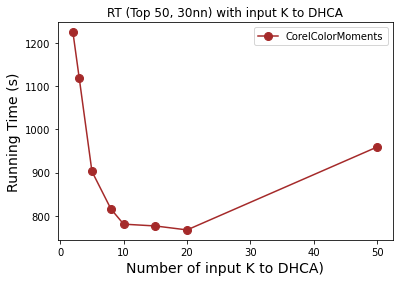

In [52]:
# Plot
fig = plt.figure()
plt.plot(ks, runningTimes, marker='.', markersize=16, label='CorelColorMoments', color='brown')
plt.xlabel('Number of input K to DHCA)', fontsize=14)
plt.ylabel('Running Time (s)', fontsize=14)
plt.title('RT (Top {}, {}nn) with input K to DHCA'.format(outliers, kNN))
plt.legend(loc='best')
plt.show()
# Save
fig.savefig('gen/corel_k_to_time.jpg')

### K vs number of verified nodes

In [49]:
# Read data
ks =[]
verifiedNodes =[]
outliers=50
kNN=30
with open('out/corel_k_to_time.jsonl') as f:
    while True:
        line = f.readline()
        if not line:
            break
        
        run = json.loads(line)
        verifiedNodes.append(run['verifiedCount'])
        ks.append(run['k'])

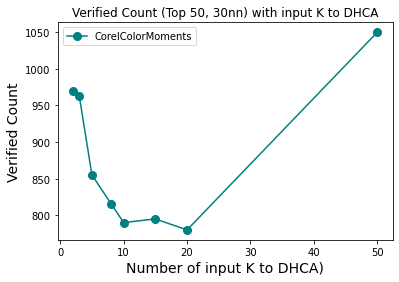

In [50]:
# Plot
fig = plt.figure()
plt.plot(ks, verifiedNodes, marker='.', markersize=16, label='CorelColorMoments', color='teal')
plt.xlabel('Number of input K to DHCA)', fontsize=14)
plt.ylabel('Verified Count', fontsize=14)
plt.title('Verified Count (Top {}, {}nn) with input K to DHCA'.format(outliers, kNN))
plt.legend(loc='best')
plt.show()
# Save
fig.savefig('gen/corel_k_to_verified_count.jpg')

### K vs Distance calculations

In [46]:
# Read data
ks =[]
verifiedNodes =[]
outliers=50
kNN=30
with open('out/corel_k_to_time.jsonl') as f:
    while True:
        line = f.readline()
        if not line:
            break
        
        run = json.loads(line)
        verifiedNodes.append(run['calculations'])
        ks.append(run['k'])

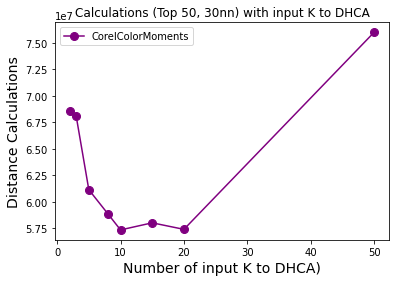

In [48]:
# Plot
fig = plt.figure()
plt.plot(ks, verifiedNodes, marker='.', markersize=16, label='CorelColorMoments', color='purple')
plt.xlabel('Number of input K to DHCA)', fontsize=14)
plt.ylabel('Distance Calculations', fontsize=14)
plt.title('Calculations (Top {}, {}nn) with input K to DHCA'.format(outliers, kNN))
plt.legend(loc='best')
plt.show()
# Save
fig.savefig('gen/corel_k_to_distance_calculations.jpg')

# Weight_Height

In [3]:
def readWeightsHeightsData(path):
    def weightConverter(x): return float(x)/2.2046226218  # Pounds to kilogram
    def heightConverter(x): return float(x)/39.3700787    # Inch to metre
    df = pd.read_csv(path,
                     converters={
                         'Weight': weightConverter,
                         'Height': heightConverter
                     })
    # Remove gender information
    df.drop(['Gender'], axis = 1)

    return df
df = readWeightsHeightsData('data/weight_height/weight_height.csv')

### Outlier scatterplot

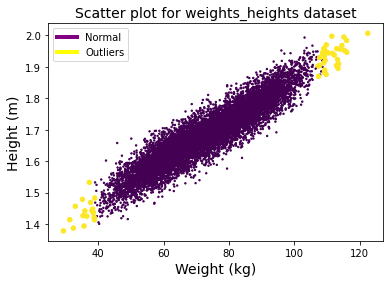

In [59]:

# Read data
outlier_indexes=[]
dataSize=0
outliers=50
kNN=30
with open('out/weights_heights.jsonl') as f:
    line = f.readline() # Only the first line
    run = json.loads(line)
    outlier_indexes = run['outlier_indexes']
    dataSize = run['dataSize']

outliers = [2]*dataSize
for i in outlier_indexes:
    outliers[i] = 20
df['outliers']=outliers

fig = plt.figure()
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Height (m)', fontsize=14)
plt.scatter(df.Weight, df.Height, s=df.outliers, c=df.outliers)
plt.title('Scatter plot for weights_heights dataset', fontsize=14)

custom_lines = [Line2D([0], [0], color='purple', lw=4),
                Line2D([0], [0], color='yellow', lw=4),]
plt.legend(custom_lines, ['Normal', 'Outliers'])

plt.show()
fig.savefig('gen/weights_heights_scatterplot.jpg')

### Comparing outlier detection using DHCA vs simple KNN

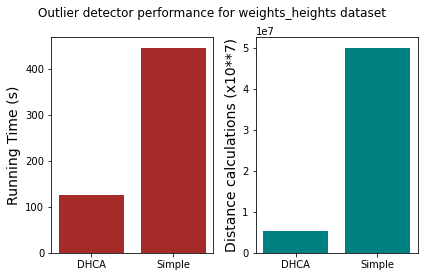

In [44]:
algo = ['DHCA', 'Simple']
runningTimes=[]
calculations=[]
with open('out/weights_heights.jsonl') as f:
    line = f.readline() # Only the first line
    run = json.loads(line)
    runningTimes.append(run['runningTime'])
    calculations.append(run['calculations'])
with open('out/weights_heights_simple.jsonl') as f:
    line = f.readline() # Only the first line
    run = json.loads(line)
    runningTimes.append(run['runningTime'])
    calculations.append(run['calculations'])
fig = plt.figure()

# RT vs Algo 
plt.subplot(1,2,1)
plt.ylabel('Running Time (s)', fontsize=14)
plt.bar(algo,runningTimes, color='brown')
# Calculations vs Algo
plt.subplot(1,2,2)
plt.ylabel('Distance calculations (x10**7)', fontsize=14)
plt.bar(algo,calculations, color='teal')

fig.suptitle('Outlier detector performance for weights_heights dataset')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig('gen/weights_heights_comparision.jpg')

# Human Gene

### Plotting outlier scores

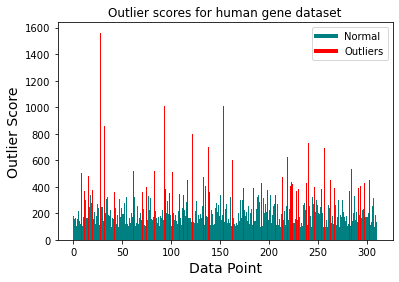

In [42]:
outlier_y = []
outlier_x = []
with open('out/human_gene.jsonl') as f:
    line = f.readline() # Only the first line
    run = json.loads(line)
    outlier_y = run['outlier_scores']
    outlier_x = run['outlier_indexes']

non_outlier_y = []
non_outlier_x = []
with open('out/human_gene_simple.jsonl') as f:
    line = f.readline() # Only the first line
    run = json.loads(line)
    non_outlier_x = list(range(run['dataSize']))
    non_outlier_y = run['all_scores']

fig = plt.figure()
plt.bar(non_outlier_x,non_outlier_y, color='teal', width=1)
plt.bar(outlier_x,outlier_y, color='red', width=1)

custom_lines = [Line2D([0], [0], color='teal', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.legend(custom_lines, ['Normal', 'Outliers'])
plt.xlabel('Data Point', fontSize=14)
plt.ylabel('Outlier Score', fontSize=14)
plt.title('Outlier scores for human gene dataset')
plt.show()
fig.savefig('gen/human_gene_outliers.jpg')